In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import pylab as py
#novos pacotes de imagem
import imageio
from skimage import data, io, filters
from skimage import img_as_float
from skimage.transform import radon, rescale
from skimage.morphology import reconstruction

% matplotlib inline

# O pontencial espontâneo e os conceitos de resistividade

As primeiras medidas realizadas em dados de perfilagem de poços foras medidas elétricas de fontes naturais. Em uma tentativa de aferir o valor de resistividade em formações rochosas repetidamente foi registrado "ruído" o que foi relacionado ao potencial espotâneo.

O pontencial espontâneo é o resultado da condução eletrolítica, característica intrínseca das rochas e das salmouras. 
Os fatores que impactam diretamente nesta condutividade eletroquímica são temperatura e salinidade.  

## O conceito de resistividade massiva (Bulk resistivity) 

A resistividade é um propriedade física do matéria que é oposta a resistência e que está associada com a forma geométrica do material. A expressão prescrita pela lei de Ohm: 


$$ V = I R $$  (Eq. 1)


indica que a corrente $I$ que flúi através de um material com resistência $R$ está associada a uma voltagem $V$. Uma perspectiva mais geral desta equação é dada pela relação presente na equação de Maxwell

$$ \vec{J} = \sigma \vec{E}$$
(Eq. 2)

onde $\vec{J}$ é a densidade de corrente, um vetor quantidade; $\vec{E}$ é o campo elétrico e $\sigma$ é a constante de proporcionalidade que indica a condutividade do material. A resistividade, parâmetro físico usado para caracterização das rochas é definido como o inverso da condutividade:


$$ Resistividade \equiv \rho = \dfrac{1}{\sigma} $$
(Eq. 3)

Uma importante exercício imaginativo para compreensão do conceito de resistividade é considerar um gás diluído presente entre duas placas com área $A$. As partículas do gás, aquelas dotadas de carga, movimentar-se-ão sobre a influência de um campo eletromagnético $E$ com uma taxa de velocidade de deslocamento, ou velocidade de deriva $v_{drift}$. A velocidade de deriva pode ser determinada pois á partícula portadora de carga é acelarada sob a inflência de um campo eletrico até que esta venha a colidir com outra partícula que está em repouso e o processo se repita novamente. O tempo entre essas colisões, $\tau$, é o parâmetro de interesse, desde que a velocidade de deriva $v_{drift}$ pode ser descrita como:

$$ v_{drift} = \dfrac{F}{m} \tau$$
(Eq.4)

onde $\dfrac{F}{m}$ representa a aceleração da partícula portadora de massa $m$ sujeita a uma força $F$. Neste exercício imaginativo a força $F$ é igual ao produto da carga pelo campo elétrico, $q E$.

A forma geral da expressão para a a velocidade de deriva sob a acção de uma força externa $F$ é

$$ v_{drift} = \mu F $$
(Eq. 5)

Onde a constante de proporcionalidade $\mu$ se refere ao grau de mobilidade da partícula no meio. A mobilidade de um gás diluído em um meio específico pode ser observado aplicando a Eq. 5 na Eq. 4.

$$ \mu = \dfrac{\tau} {m}$$ (Eq. 6)

Figura 1: [Representação de partículas carregadas de um gás diluído em movimento sob a influência de uma carga elétrica. O espaço de espessura $v_{drift} \times \Delta t$ é varrido por partículas carregadas, contibuindo para a corrente, em um tempo $\Delta t$ ](Imagens/sp1.jpg)

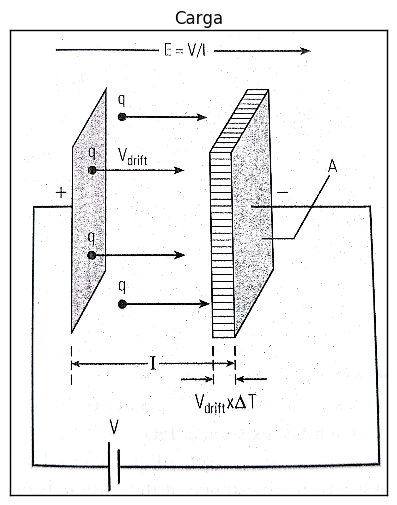

In [3]:
corrente = io.imread( "Imagens/sp1.jpg")
py.rcParams['figure.figsize'] = (6.0, 6.0)
plt.title("Carga")
fig = plt.imshow(corrente)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.show()

Para ilustrar a relação entre resistividade e resistência é importante definir uma expressão que relacione uma corrente fluindo no sistema hipotético da figura 1, obedecendo a lei de Ohm. 

A região do espaço que contém as cargas pontuais que irão atingir as placas em um determinado período no tempo é chamada de $\Delta t$. A espessura dessa região é $ v_{drift} \times \Delta t$. O número de carga coletado em um dado intervalo de tempo é $ \Delta t$. O número de cargas coletadas durante o impacto com o eletrodo de área $ A $ é $n_{i} v_{drift} \Delta t A$, onde $n_{i}$ é a densidade da partícula (o número de carga por unidade de volume). A corrente $I$ é definida como  

$$I = \dfrac{n_{i} v_{drift} \Delta t A}{\Delta t} q $$   (Eq. 6)

E a relação com a velocidade de deriva pode ser definida como 

$$v_{drift} = \mu F = \mu q \dfrac{V}{l}$$ (Eq. 7)

desde que a força exercida pelo campo elétrico é dado pela queda de tensão por unidade de comprimento e a separação entre as duas placas é $ l $. 

Combinando as equações $6$ e $7$ temos a relação da corrente

$$I = \dfrac{n_{i} \mu q \dfrac{V}{l} \Delta t A}{\Delta t} q $$  (Eq. 8)

Quando comparada com a lei de Ohm, $I = \dfrac{1}{R} V$, indica a resistência da geometria da figura 1. A resistência pode ser espressada da seguinte forma:

$$ R = \dfrac{1}{n_{i}\mu q^{2}} \dfrac{l}{A} $$ (Eq. 9)

Uma importante observação é que a resistência é composta por duas partes. A primeira é dependente do material, $ \dfrac{1}{n_{i}\mu q^{2}}$. 

A segunda é puramente geométrica que é o tamanho da amostra dividida pela área da superfície de contato entre as duas placas.  A resistividade $\rho$ é em fato o primeiro fator. 

$$ R = \dfrac{1}{n_{i}\mu q^{2}} \dfrac{l}{A} = \rho \dfrac{l}{A}$$ (Eq. 10)

O que seque é que a dimensionalidade da resistividade é dada em $ohms-m^{2}/m$ ou $Ohm-m$. Na prática isso representa um material cúbico com dimensões de $1$m  em cada lado que terá a resistência total de $1$$Ohm$. Confirme ilstrado da figura 2. 

Figura 2: [Um cubo de 1 m de resistividade 1 ohm-m tem a resistência de 1 ohm em cada face.](Imagens/sp2.jpg)

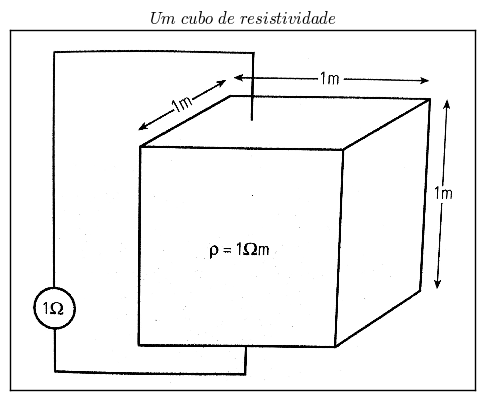

In [4]:
cube = io.imread( "Imagens/sp2.jpg")
py.rcParams['figure.figsize'] = (6.0, 6.0)
plt.title("$Um$ $cubo$ $de$ $resistividade$")
fig = plt.imshow(cube)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.show()

Sendo assim um sistema de medida de resistividade consiste em uma amostra do material a ser medido contido em uma geometria fixa. Caso a medida da resistência da amostra é medida, a resistividade pode ser obtida através da relação. 

$$ \rho = R \times \dfrac{A}{l} $$ (Eq. 11)

que, através da lei de Ohm, se torna:

$$ \rho = \dfrac{V}{I} \dfrac{A}{l} = k \dfrac{V}{I}$$ 

Aonde a constante $k$ é uma constante do sistema que convertea medida de voltagem $V$ para uma dada corrente $I$ na resistividade do material. 

## Um experimento prático

Em termos práticos, a figura 2, mostra um dispositivo de medida de resistividade chamado $\textit{copo de lama}$ aonde dentro é colocado uma amostra. 

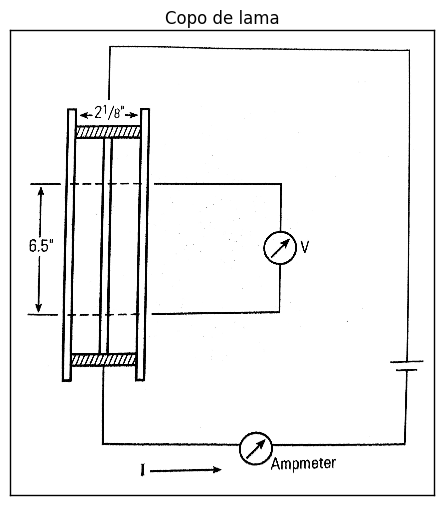

In [5]:
mudcup = io.imread( "Imagens/sp3.jpg")
py.rcParams['figure.figsize'] = (6.0, 6.0)
plt.title("Copo de lama")
fig = plt.imshow(mudcup)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.show()

O esquemático da figura 2 apresenta um cpopo de lama ára a mediação da resistividade de uma amostra. A corrente $I$ passa através da amostra e uma voltagem correspondente $V$ é medida. 

No experimento, as dimensões do sistema são constantes com valor de $0,012$m ($\dfrac{A}{l}$). A resistividade, $\rho$, em $Ohm-m$ é obtida através da medida da resistência $R$.

Qual seria o valor da resistividade de uma água salina? Considere uma resistência de $166$ $Ohms$.

In [56]:
#1 polegada = 0,0254 metros

R = 166.   #Ohms
a= (((2.0*8.0+1.0)/8.0) * 6.5)     #12. #m
l=  6.5        #1000. #m
rho= (R * (a/l))*0.0254

print('rho=', rho, 'Ohm-m')

('rho=', 8.95985, 'Ohm-m')
